# Моделирование информационных процессов
Реализовать численное интегрирование уравнения $m
\ddot y + p \dot y + k y = 0$, где $m, p, k$ - заданные числовые параметры

Преобразуем исходное уравнение в систему уравнений первого порядка:

\begin{cases}
\dot y = v \\ 
\dot v = -\frac{p}{m} v - \frac{k}{m} y
\end{cases}

Решим методом Рунге-Кутты четвёртого порядка

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [61]:
m = 10.0
p = 0.1
k = 2.0

In [62]:
def f1(v):
    return v

def f2(y, v):
    return -(p / m) * v - (k / m) * y

In [63]:
x0 = 0.0
x1 = 20.0
dt = 0.001

n = int((x1 - x0) / dt)
T = np.linspace(x0, x1, n)
Y = np.zeros(n)
V = np.zeros(n)

Y[0] = 1.0  # Начальные условия
V[0] = 0.0

for i in range(1, n):
    k1_y = dt * f1(V[i-1])
    k1_v = dt * f2(Y[i-1], V[i-1])
    
    k2_y = dt * f1(V[i-1] + 0.5 * k1_v)
    k2_v = dt * f2(Y[i-1] + 0.5 * k1_y, V[i-1] + 0.5 * k1_v)
    
    k3_y = dt * f1(V[i-1] + 0.5 * k2_v)
    k3_v = dt * f2(Y[i-1] + 0.5 * k2_y, V[i-1] + 0.5 * k2_v)
    
    k4_y = dt * f1(V[i-1] + k3_v)
    k4_v = dt * f2(Y[i-1] + k3_y, V[i-1] + k3_v)
    
    Y[i] = Y[i-1] + (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6
    V[i] = V[i-1] + (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6

In [64]:
print(f'Y = {Y}')
print(f'dy = {V}')

Y = [ 1.          0.9999999   0.9999996  ... -0.79689683 -0.79708449
 -0.79727199]
dy = [ 0.         -0.0002     -0.0004     ... -0.18773935 -0.18757807
 -0.18741676]


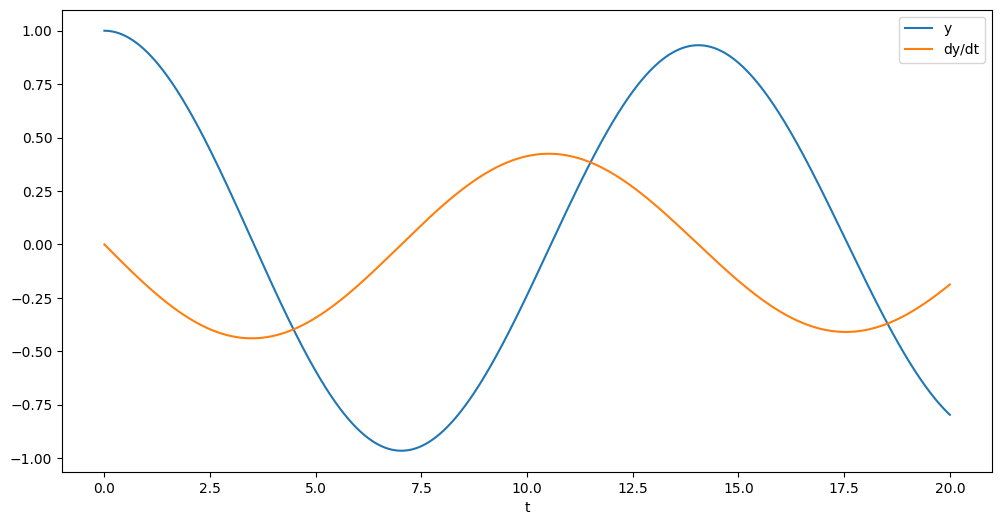

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(T, Y, label='y')
plt.plot(T, V, label='dy/dt')
plt.xlabel('t')

plt.legend()
plt.show()

Проверка

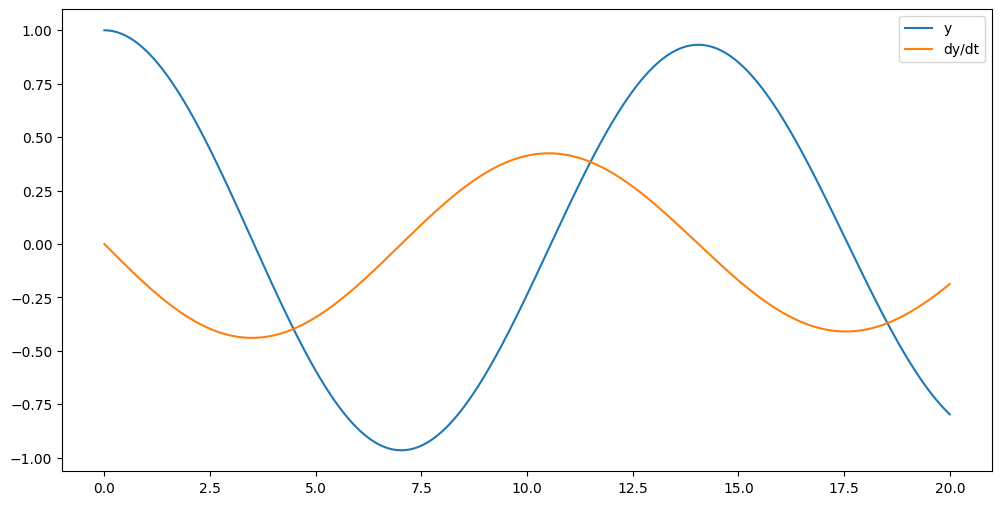

In [66]:
def system(state, t):
    y, v = state
    dydt = v
    dvdt = -(p/m) * v - (k/m) * y
    return [dydt, dvdt]


solution_odeint = odeint(system, [1.0, 0.0], T)

y_odeint = solution_odeint[:, 0]
v_odeint = solution_odeint[:, 1]

plt.figure(figsize=(12, 6))
plt.plot(T, y_odeint, label='y')
plt.plot(T, v_odeint, label='dy/dt')
plt.legend()
plt.show()